In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.read_csv('dataset/Coffee_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14


In [3]:
df.columns

Index(['hour_of_day', 'cash_type', 'money', 'coffee_name', 'Time_of_Day',
       'Weekday', 'Month_name', 'Weekdaysort', 'Monthsort', 'Date', 'Time'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


In [10]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort,Date
count,3547.000000,3547.000000,3547.000000,3547.000000,3547
mean,14.185791,31.645216,3.845785,6.453905,2024-10-04 17:34:43.676346368
min,6.000000,18.120000,1.000000,1.000000,2024-03-01 00:00:00
25%,10.000000,27.920000,2.000000,3.000000,2024-07-17 12:00:00
50%,14.000000,32.820000,4.000000,7.000000,2024-10-10 00:00:00
75%,18.000000,35.760000,6.000000,10.000000,2025-01-11 00:00:00
max,22.000000,38.700000,7.000000,12.000000,2025-03-23 00:00:00
std,4.234010,4.877754,1.971501,3.500754,NaN


In [26]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Konversi kolom waktu
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
df['Time'] = pd.to_timedelta(df['Time'].astype(str))

df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,year,month,day,day_name
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,0 days 10:15:50,2024,3,1,Friday
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 12:19:22,2024,3,1,Friday
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 12:20:18,2024,3,1,Friday
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 13:46:33,2024,3,1,Friday
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,0 days 13:48:14,2024,3,1,Friday


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   hour_of_day  3547 non-null   int64          
 1   cash_type    3547 non-null   object         
 2   money        3547 non-null   float64        
 3   coffee_name  3547 non-null   object         
 4   Time_of_Day  3547 non-null   object         
 5   Weekday      3547 non-null   object         
 6   Month_name   3547 non-null   object         
 7   Weekdaysort  3547 non-null   int64          
 8   Monthsort    3547 non-null   int64          
 9   Date         3547 non-null   datetime64[ns] 
 10  Time         3547 non-null   timedelta64[ns]
 11  year         3547 non-null   int32          
 12  month        3547 non-null   int32          
 13  day          3547 non-null   int32          
 14  day_name     3547 non-null   object         
dtypes: datetime64[ns](1), float64(1), int3

In [29]:
numerik = df.select_dtypes(include=['number']).columns.tolist()
kategori = df.select_dtypes(exclude=['number']).columns.tolist()

df[kategori].head()

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Date,day_name
0,card,Latte,Morning,Fri,Mar,2024-03-01,Friday
1,card,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,Friday
2,card,Hot Chocolate,Afternoon,Fri,Mar,2024-03-01,Friday
3,card,Americano,Afternoon,Fri,Mar,2024-03-01,Friday
4,card,Latte,Afternoon,Fri,Mar,2024-03-01,Friday


In [28]:
df[numerik].head()

,hour_of_day,money,Weekdaysort,Monthsort
0,10,38.7,5,3
1,12,38.7,5,3
2,12,38.7,5,3
3,13,28.9,5,3
4,13,38.7,5,3


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop_duplicates().head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14


In [30]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort,Date,Time,year,month,day
count,3547.000000,3547.000000,3547.000000,3547.000000,3547,3547,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905,2024-10-04 17:34:43.676346368,0 days 14:40:35.531716943,2024.265858,6.453905,15.578517
min,6.000000,18.120000,1.000000,1.000000,2024-03-01 00:00:00,0 days 06:50:04,2024.000000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000,2024-07-17 12:00:00,0 days 10:57:06,2024.000000,3.000000,8.000000
50%,14.000000,32.820000,4.000000,7.000000,2024-10-10 00:00:00,0 days 14:31:28,2024.000000,7.000000,16.000000
75%,18.000000,35.760000,6.000000,10.000000,2025-01-11 00:00:00,0 days 18:11:31,2025.000000,10.000000,23.000000
max,22.000000,38.700000,7.000000,12.000000,2025-03-23 00:00:00,0 days 22:59:18,2025.000000,12.000000,31.000000
std,4.234010,4.877754,1.971501,3.500754,NaN,0 days 04:13:10.420693453,0.441852,3.500754,8.649059


In [11]:
df.describe(include='object')

,cash_type,coffee_name,Time_of_Day,Weekday,Month_name,Time
count,3547,3547,3547,3547,3547,3547
unique,1,8,3,7,12,3428
top,card,Americano with Milk,Afternoon,Tue,Mar,19:03:53
freq,3547,809,1205,572,494,3


In [12]:
df.isna().sum()

hour_of_day    0
cash_type      0
money          0
coffee_name    0
Time_of_Day    0
Weekday        0
Month_name     0
Weekdaysort    0
Monthsort      0
Date           0
Time           0
dtype: int64

In [13]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['day_name'] = df['Date'].dt.day_name()
df[['year', 'month', 'day', 'day_name']].head()

,year,month,day,day_name
0,2024,3,1,Friday
1,2024,3,1,Friday
2,2024,3,1,Friday
3,2024,3,1,Friday
4,2024,3,1,Friday


In [14]:
Q1 = df[numerik].quantile(0.25)
Q3 = df[numerik].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_outlier = df[((df[numerik] < lower_bound) | (df[numerik] > upper_bound)).any(axis=1)]
print("Data Outlier: ", df_outlier.shape[0], "baris")

Data Outlier:  0 baris


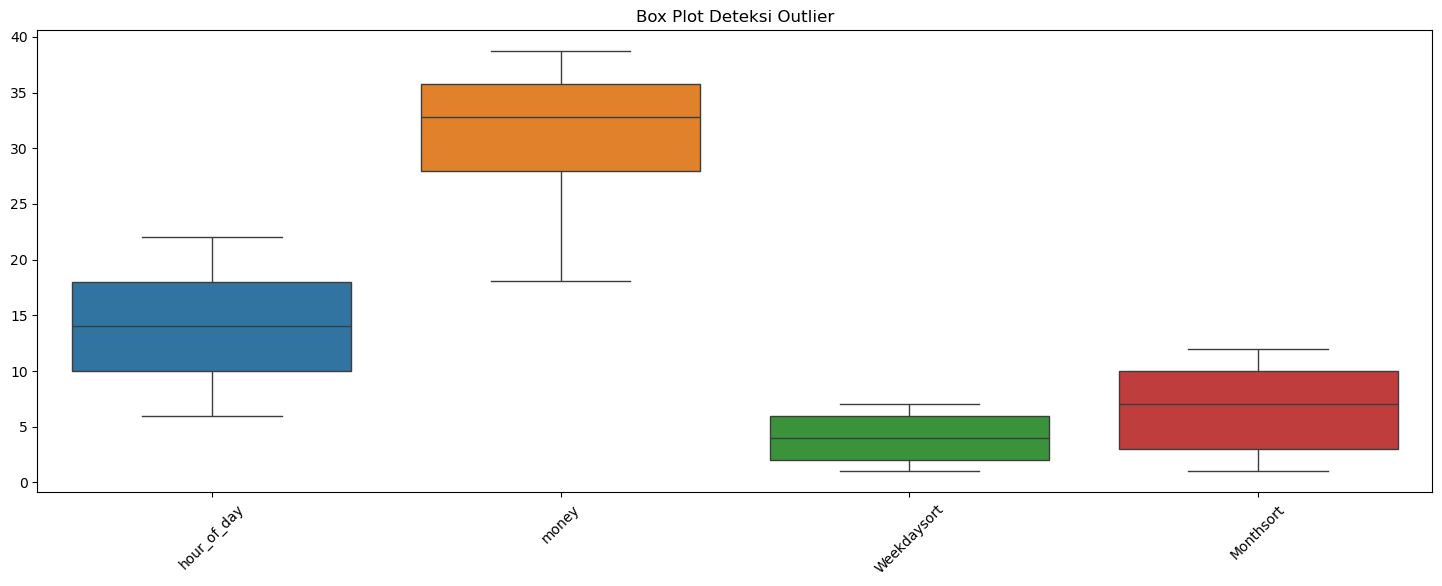

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(18, 6))
sns.boxplot(data=df[numerik])
plt.title("Box Plot Deteksi Outlier")
plt.xticks(rotation=45)
plt.show()

In [16]:
#Menghitung rata-rata penjualan kopi setiap tahun
rata_penjualan = df.groupby(['coffee_name','year'])['money'].mean().reset_index()
rata_penjualan

,coffee_name,year,money
0,Americano,2024,25.987563
1,Americano,2025,25.960000
2,Americano with Milk,2024,30.513839
3,Americano with Milk,2025,30.860000
4,Cappuccino,2024,35.924231
5,Cappuccino,2025,35.760000
6,Cocoa,2024,35.576691
7,Cocoa,2025,35.760000
8,Cortado,2024,25.700474
9,Cortado,2025,25.960000


In [17]:
#Menghitung jumlah pembayaran menggunakan metode apa pada setiap tahunnya
jumlah_pembayaran = df.groupby(['year'])['cash_type'].count().reset_index()
jumlah_pembayaran

,year,cash_type
0,2024,2604
1,2025,943


In [18]:
#Agregasi beberapa statistik sekaligus per menu
#Harganya ada beda beda, ada yang 23/28
deskripsi_penjualan = df.groupby('coffee_name')['money'].agg(['mean', 'min', 'max', 'count']).reset_index()
deskripsi_penjualan

,coffee_name,mean,min,max,count
0,Americano,25.975638,23.02,28.9,564
1,Americano with Milk,30.594710,27.92,33.8,809
2,Cappuccino,35.883004,32.82,38.7,486
3,Cocoa,35.653389,32.82,38.7,239
4,Cortado,25.731220,23.02,28.9,287
5,Espresso,20.854884,18.12,24.0,129
6,Hot Chocolate,35.990797,32.82,38.7,276
7,Latte,35.502378,32.82,38.7,757


In [19]:
#Menghitung jumlah penjualan permenu pada tahun 2024/2025
deskripsi_penjualan = df.groupby(['coffee_name', 'year' ])['money'].sum().reset_index().sort_values(by='money', ascending=False)
deskripsi_penjualan

,coffee_name,year,money
14,Latte,2024,21439.78
2,Americano with Milk,2024,18918.58
4,Cappuccino,2024,13076.42
0,Americano,2024,8316.02
12,Hot Chocolate,2024,7430.26
8,Cortado,2024,6502.22
1,Americano,2025,6334.24
3,Americano with Milk,2025,5832.54
15,Latte,2025,5435.52
6,Cocoa,2024,4945.16


In [20]:
#Diurutkan dari yang paling besar/ udah ditambahin di kolom atas
deskripsi_penjualan.sort_values(by='money', ascending=False)

,coffee_name,year,money
14,Latte,2024,21439.78
2,Americano with Milk,2024,18918.58
4,Cappuccino,2024,13076.42
0,Americano,2024,8316.02
12,Hot Chocolate,2024,7430.26
8,Cortado,2024,6502.22
1,Americano,2025,6334.24
3,Americano with Milk,2025,5832.54
15,Latte,2025,5435.52
6,Cocoa,2024,4945.16
